# Zeroshot Classification

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/zeroshot-classification](https://github.com/huseinzol05/Malaya/tree/master/example/zeroshot-classification).
    
</div>

<div class="alert alert-info">

This module trained on both standard and local (included social media) language structures, so it is save to use for both.
    
</div>

In [1]:
%%time
import malaya

CPU times: user 4.86 s, sys: 709 ms, total: 5.57 s
Wall time: 5 s


/Users/huseinzolkepli/Documents/Malaya/malaya/preprocessing.py:259: FutureWarning: Possible nested set at position 2289
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))


### what is zero-shot classification

Commonly we supervised a machine learning on specific labels, negative / positive for sentiment, anger / happy / sadness for emotion and etc. The model cannot give an output if we want to know how much percentage of 'jealous' in emotion analysis model because supported labels are only {anger, happy, sadness}. Imagine, for example, trying to identify a text without ever having seen one 'jealous' label before, impossible. **So, zero-shot trying to solve this problem.**

zero-shot learning refers to the process by which a machine learns how to recognize objects (image, text, any features) without any labeled training data to help in the classification.

[Yin et al. (2019)](https://arxiv.org/abs/1909.00161) stated in his paper, any pretrained language model finetuned on text similarity actually can acted as an out-of-the-box zero-shot text classifier.

So, we are going to use transformer models from `malaya.similarity.transformer` with a little tweaks.

### List available Transformer models

In [2]:
malaya.zero_shot.classification.available_transformer()

,Size (MB),Quantized Size (MB),macro precision,macro recall,macro f1-score
bert,423.4,111.0,0.88315,0.88656,0.88405
tiny-bert,56.6,15.0,0.87210,0.87546,0.87292
albert,48.3,12.8,0.87164,0.87146,0.87155
tiny-albert,21.9,6.0,0.82234,0.82383,0.82295
xlnet,448.7,119.0,0.80866,0.76775,0.77112
alxlnet,49.0,13.9,0.88756,0.88700,0.88727


We trained on [Quora Question Pairs](https://github.com/huseinzol05/Malay-Dataset#quora), [translated SNLI](https://github.com/huseinzol05/Malay-Dataset#snli) and [translated MNLI](https://github.com/huseinzol05/Malay-Dataset#mnli)

Make sure you can check accuracy chart from here first before select a model, https://malaya.readthedocs.io/en/latest/Accuracy.html#similarity

**You might want to use ALXLNET, a very small size, 49MB, but the accuracy is still on the top notch.**

### Load transformer model

In this example, I am going to load `alxlnet`, feel free to use any available models above.

```python
def transformer(model: str = 'bert', quantized: bool = False, **kwargs):
    """
    Load Transformer zero-shot model.

    Parameters
    ----------
    model : str, optional (default='bert')
        Model architecture supported. Allowed values:

        * ``'bert'`` - Google BERT BASE parameters.
        * ``'tiny-bert'`` - Google BERT TINY parameters.
        * ``'albert'`` - Google ALBERT BASE parameters.
        * ``'tiny-albert'`` - Google ALBERT TINY parameters.
        * ``'xlnet'`` - Google XLNET BASE parameters.
        * ``'alxlnet'`` - Malaya ALXLNET BASE parameters.
    
    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model. 
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result : malaya.model.bert.ZeroshotBERT class
    """
```

In [3]:
model = malaya.zero_shot.classification.transformer(model = 'alxlnet')

### Load Quantized model

To load 8-bit quantized model, simply pass `quantized = True`, default is `False`.

We can expect slightly accuracy drop from quantized model, and not necessary faster than normal 32-bit float model, totally depends on machine.

In [4]:
quantized_model = malaya.zero_shot.classification.transformer(model = 'alxlnet', quantized = True)

#### predict batch

```python
def predict_proba(self, strings: List[str], labels: List[str]):
    """
    classify list of strings and return probability.

    Parameters
    ----------
    strings : List[str]
    labels : List[str]

    Returns
    -------
    list: list of float
    """
```

Because it is a zero-shot, we need to give labels for the model.

In [5]:
# copy from twitter

string = 'gov macam bengong, kami nk pilihan raya, gov backdoor, sakai'

In [6]:
model.predict_proba([string], labels = ['najib razak', 'mahathir', 'kerajaan', 'PRU', 'anarki'])

[{'najib razak': 0.02823881,
  'mahathir': 0.059464306,
  'kerajaan': 0.0032106405,
  'PRU': 0.9422462,
  'anarki': 0.9644167}]

In [7]:
quantized_model.predict_proba([string], labels = ['najib razak', 'mahathir', 'kerajaan', 'PRU', 'anarki'])

[{'najib razak': 0.004405794,
  'mahathir': 0.015691597,
  'kerajaan': 0.0154573675,
  'PRU': 0.8233098,
  'anarki': 0.34632725}]

Quite good.

In [8]:
string = 'tolong order foodpanda jab, lapar'

In [9]:
model.predict_proba([string], labels = ['makan', 'makanan', 'novel', 'buku', 'kerajaan', 'food delivery'])

[{'makan': 0.54341537,
  'makanan': 0.9774909,
  'novel': 0.00090197776,
  'buku': 0.00044378178,
  'kerajaan': 0.0028080132,
  'food delivery': 0.8143844}]

the model understood `order foodpanda` got close relationship with `makan`, `makanan` and `food delivery`.

In [10]:
string = 'kerajaan sebenarnya sangat prihatin dengan rakyat, bagi duit bantuan'

In [11]:
model.predict_proba([string], labels = ['makan', 'makanan', 'novel', 'buku', 'kerajaan', 'food delivery',
                                       'kerajaan jahat', 'kerajaan prihatin', 'bantuan rakyat'])

[{'makan': 0.008046242,
  'makanan': 0.0016310408,
  'novel': 0.00044678123,
  'buku': 0.00071050954,
  'kerajaan': 0.98634493,
  'food delivery': 0.0009665733,
  'kerajaan jahat': 0.1006222,
  'kerajaan prihatin': 0.9954796,
  'bantuan rakyat': 0.35266426}]

### Vectorize

Let say you want to visualize sentence / word level in lower dimension, you can use `model.vectorize`,

```python
def vectorize(
    self, strings: List[str], labels: List[str], method: str = 'first'
):
    """
    vectorize a string.

    Parameters
    ----------
    strings: List[str]
    labels : List[str]
    method : str, optional (default='first')
        Vectorization layer supported. Allowed values:

        * ``'last'`` - vector from last sequence.
        * ``'first'`` - vector from first sequence.
        * ``'mean'`` - average vectors from all sequences.
        * ``'word'`` - average vectors based on tokens.


    Returns
    -------
    result: np.array
    """
```

#### Sentence level

In [4]:
texts = ['kerajaan sebenarnya sangat prihatin dengan rakyat, bagi duit bantuan',
        'gov macam bengong, kami nk pilihan raya, gov backdoor, sakai',
        'tolong order foodpanda jab, lapar',
        'Hapuskan vernacular school first, only then we can talk about UiTM']
labels = ['makan', 'makanan', 'novel', 'buku', 'kerajaan', 'food delivery',
          'kerajaan jahat', 'kerajaan prihatin', 'bantuan rakyat']
r = quantized_model.vectorize(texts, labels, method = 'first')

`vectorize` method from zeroshot classification model will returned 2 values, (combined, vector).

In [5]:
r[0][:5]

[('kerajaan sebenarnya sangat prihatin dengan rakyat, bagi duit bantuan',
  'makan'),
 ('kerajaan sebenarnya sangat prihatin dengan rakyat, bagi duit bantuan',
  'makanan'),
 ('kerajaan sebenarnya sangat prihatin dengan rakyat, bagi duit bantuan',
  'novel'),
 ('kerajaan sebenarnya sangat prihatin dengan rakyat, bagi duit bantuan',
  'buku'),
 ('kerajaan sebenarnya sangat prihatin dengan rakyat, bagi duit bantuan',
  'kerajaan')]

In [6]:
r[1]

array([[-0.00587193, -0.7214614 , -0.7524409 , ...,  0.31107777,
         1.022762  ,  0.28308758],
       [ 0.63863456,  0.12698255,  0.67567766, ...,  0.7627216 ,
         0.56795114, -0.37056473],
       [-0.90291303,  0.93581504,  0.05650915, ...,  0.5578094 ,
         1.1304276 ,  0.5470246 ],
       ...,
       [-2.1161728 , -1.4592253 ,  0.5284856 , ...,  0.28636536,
        -0.36558965, -0.8226106 ],
       [-2.2050292 , -0.14624506,  0.19812807, ...,  0.1307496 ,
        -0.20792441,  0.18430969],
       [-2.5969799 ,  0.4205628 ,  0.18376699, ...,  0.124988  ,
        -0.9915105 , -0.10085672]], dtype=float32)

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE().fit_transform(r[1])
tsne.shape

(36, 2)

In [8]:
unique_labels = list(set([i[1] for i in r[0]]))
palette = plt.cm.get_cmap('hsv', len(unique_labels))

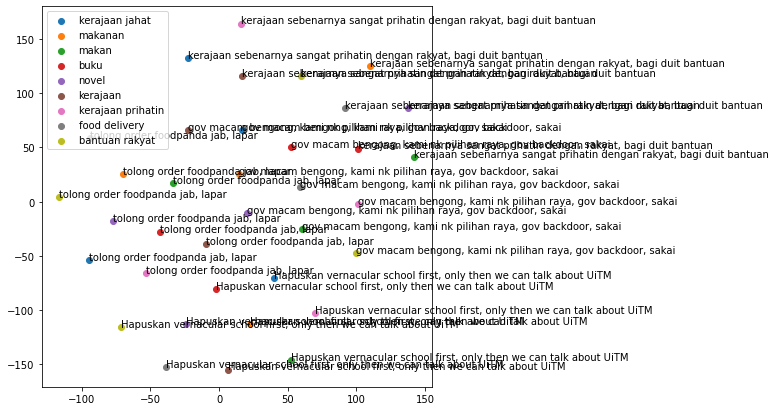

In [9]:
plt.figure(figsize = (7, 7))

for label in unique_labels:
    indices = [i for i in range(len(r[0])) if r[0][i][1] == label]
    plt.scatter(tsne[indices, 0], tsne[indices, 1], cmap = palette(unique_labels.index(label)),
               label = label)
    
labels = [i[0] for i in r[0]]
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )
plt.legend()

#### Word level

In [28]:
texts = ['kerajaan sebenarnya sangat prihatin dengan rakyat, bagi duit bantuan',
        'gov macam bengong, kami nk pilihan raya, gov backdoor, sakai',
        'tolong order foodpanda jab, lapar',
        'Hapuskan vernacular school first, only then we can talk about UiTM']
labels = ['makan', 'makanan', 'novel', 'buku', 'kerajaan', 'food delivery',
          'kerajaan jahat', 'kerajaan prihatin', 'bantuan rakyat']
r = quantized_model.vectorize(texts, labels, method = 'word')

In [29]:
x, y, labels = [], [], []
for no, row in enumerate(r[1]):
    x.extend([i[0] for i in row])
    y.extend([i[1] for i in row])
    labels.extend([r[0][no][1]] * len(row))

In [30]:
tsne = TSNE().fit_transform(y)
tsne.shape

(315, 2)

In [31]:
unique_labels = list(set(labels))
palette = plt.cm.get_cmap('hsv', len(unique_labels))

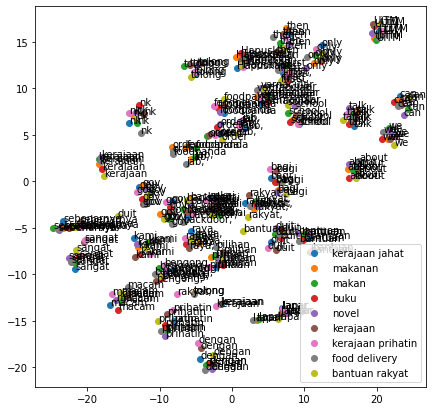

In [32]:
plt.figure(figsize = (7, 7))

for label in unique_labels:
    indices = [i for i in range(len(labels)) if labels[i] == label]
    plt.scatter(tsne[indices, 0], tsne[indices, 1], cmap = palette(unique_labels.index(label)),
               label = label)
    
labels = x
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )
plt.legend()

### Stacking models

More information, you can read at https://malaya.readthedocs.io/en/latest/Stack.html

If you want to stack zero-shot classification models, you need to pass labels using keyword parameter,

```python
malaya.stack.predict_stack([model1, model2], List[str], labels = List[str])
```

We will passed `labels` as `**kwargs`.

In [10]:
alxlnet = malaya.zero_shot.classification.transformer(model = 'alxlnet')
albert = malaya.zero_shot.classification.transformer(model = 'albert')
tiny_bert = malaya.zero_shot.classification.transformer(model = 'tiny-bert')


INFO:tensorflow:loading sentence piece model


In [11]:
string = 'kerajaan sebenarnya sangat prihatin dengan rakyat, bagi duit bantuan'
labels = ['makan', 'makanan', 'novel', 'buku', 'kerajaan', 'food delivery', 
 'kerajaan jahat', 'kerajaan prihatin', 'bantuan rakyat']
malaya.stack.predict_stack([alxlnet, albert, tiny_bert], [string], 
                           labels = labels)

[{'makan': 0.0044827852,
  'makanan': 0.0027062024,
  'novel': 0.0020867025,
  'buku': 0.013082165,
  'kerajaan': 0.8859287,
  'food delivery': 0.0028363755,
  'kerajaan jahat': 0.018133936,
  'kerajaan prihatin': 0.9922408,
  'bantuan rakyat': 0.909674}]